**Case Brief Offer Retraction Prediction for IT Hiring**

ScaleneWorks, a talent acquisition firm supporting large Indian IT services companies, faces a persistent challenge: candidates who accept job offers but later retract before joining. These last-minute retractions result in wasted time, increased costs, and client delivery risks. For one client with 12,000 offers annually and a 30% retraction rate, this translates to an estimated 54,000+ man-hours wasted.

This project builds a predictive model using historical recruitment data to estimate the likelihood of a candidate retracting an accepted offer. By flagging high-risk profiles early, HR teams can prioritize stable candidates and reduce rework in the recruitment cycle.



**Result**

With the improved model, if offers are made only to candidates predicted as likely to join, the expected retraction rate can drop from 30% to ~15%,  This represents a substantial reduction in hiring cycle wastage and business disruption.

**Data Dictionary**


Column Name	Description

**SLNO**	Serial number

**Candidate.Ref**	Unique candidate reference ID

**DOJ.Extended**	Whether the date of joining was extended (Yes/No)

**Duration.to.accept.offer**	Number of days taken by the candidate to accept the offer

**Notice.period**	Candidate's notice period in current organization

**Offered.band**	Band or level offered to the candidate (e.g., E1, E2)

**Pecent.hike.expected.in.CTC**	% Hike expected by the candidate

**Percent.hike.offered.in.CTC**	% Hike offered by the company

**Percent.difference.CTC**	% difference between expected and offered hike

**Joining.Bonus**	Whether joining bonus was offered (Yes/No)

**Candidate.relocate.actual**	Whether the candidate is willing to relocate (Yes/No)

**Gender**	Gender of the candidate

**Candidate.Source**	Source of candidate (e.g., Employee Referral, Agency)

**Rex.in.Yrs**	Relevant experience in years

**LOB**	Line of business/department (e.g., INFRA, ERS)

**Location**	Job location offered

**Age**	Age of the candidate

**Status**	Target variable — whether the candidate joined (Joined) or retracted (Not Joined)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


**Reading the dataframe**

In [2]:
df=pd.read_csv('HR Analytics.csv')

In [3]:
df.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [4]:
cols=df.columns
cols

Index(['SLNO', 'Candidate.Ref', 'DOJ.Extended', 'Duration.to.accept.offer',
       'Notice.period', 'Offered.band', 'Pecent.hike.expected.in.CTC',
       'Percent.hike.offered.in.CTC', 'Percent.difference.CTC',
       'Joining.Bonus', 'Candidate.relocate.actual', 'Gender',
       'Candidate.Source', 'Rex.in.Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

**Checking Length of dataframe**

In [5]:
len(df)

9011

**Exploring data types and other basic info about the dataframe**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         9011 non-null   int64  
 1   Candidate.Ref                9011 non-null   int64  
 2   DOJ.Extended                 9011 non-null   object 
 3   Duration.to.accept.offer     9011 non-null   int64  
 4   Notice.period                9011 non-null   int64  
 5   Offered.band                 9011 non-null   object 
 6   Pecent.hike.expected.in.CTC  9011 non-null   float64
 7   Percent.hike.offered.in.CTC  9011 non-null   float64
 8   Percent.difference.CTC       9011 non-null   float64
 9   Joining.Bonus                9011 non-null   object 
 10  Candidate.relocate.actual    9011 non-null   object 
 11  Gender                       9011 non-null   object 
 12  Candidate.Source             9011 non-null   object 
 13  Rex.in.Yrs        

In [7]:
df['Status'].value_counts()

,count
Status,
Joined,7326
Not Joined,1685


**Checking For Null Values**

In [8]:
df.isnull().sum()

,0
SLNO,0
Candidate.Ref,0
DOJ.Extended,0
Duration.to.accept.offer,0
Notice.period,0
Offered.band,0
Pecent.hike.expected.in.CTC,0
Percent.hike.offered.in.CTC,0
Percent.difference.CTC,0
Joining.Bonus,0


**Descriptive Statistics**

In [9]:
df.describe()

,SLNO,Candidate.Ref,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age
count,9011.000000,9.011000e+03,9011.000000,9011.000000,9011.000000,9011.000000,9011.000000,9011.000000,9011.000000
mean,5967.857286,2.843302e+06,21.369437,39.278659,43.861520,40.656652,-1.569059,4.239929,29.916879
std,3375.254250,4.864133e+05,25.938301,22.230658,29.860747,36.084426,19.608174,2.552387,4.116165
min,1.000000,2.109586e+06,-228.000000,0.000000,-68.830000,-60.530000,-67.270000,0.000000,20.000000
25%,3202.500000,2.383377e+06,3.000000,30.000000,27.270000,22.080000,-8.330000,3.000000,27.000000
50%,5971.000000,2.807385e+06,10.000000,30.000000,40.000000,36.000000,0.000000,4.000000,29.000000
75%,8736.000000,3.300058e+06,33.000000,60.000000,53.850000,50.000000,0.000000,6.000000,34.000000
max,12333.000000,3.836076e+06,224.000000,120.000000,359.770000,471.430000,300.000000,24.000000,62.000000


In [10]:
df=df[df['Duration.to.accept.offer']>=0]

In [11]:
df['Status']=df['Status'].map({'Joined':1,'Not Joined':0})

In [ ]:
df.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,1
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,1
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,1
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,1
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,1


In [12]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols

Index(['DOJ.Extended', 'Offered.band', 'Joining.Bonus',
       'Candidate.relocate.actual', 'Gender', 'Candidate.Source', 'LOB',
       'Location'],
      dtype='object')

In [13]:
df[cat_cols].nunique()

,0
DOJ.Extended,2
Offered.band,4
Joining.Bonus,2
Candidate.relocate.actual,2
Gender,2
Candidate.Source,3
LOB,9
Location,11


**Determining number of unique values in each of the categorical columns**

In [14]:
for col in cat_cols:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("-" * 30)

Unique values in column 'DOJ.Extended':
['Yes' 'No']
------------------------------
Unique values in column 'Offered.band':
['E2' 'E1' 'E3' 'E0']
------------------------------
Unique values in column 'Joining.Bonus':
['No' 'Yes']
------------------------------
Unique values in column 'Candidate.relocate.actual':
['No' 'Yes']
------------------------------
Unique values in column 'Gender':
['Female' 'Male']
------------------------------
Unique values in column 'Candidate.Source':
['Agency' 'Employee Referral' 'Direct']
------------------------------
Unique values in column 'LOB':
['ERS' 'INFRA' 'Healthcare' 'BFSI' 'CSMP' 'ETS' 'AXON' 'EAS' 'MMS']
------------------------------
Unique values in column 'Location':
['Noida' 'Chennai' 'Gurgaon' 'Bangalore' 'Hyderabad' 'Kolkata' 'Cochin'
 'Pune' 'Others' 'Mumbai' 'Ahmedabad']
------------------------------


In [15]:
df_encoded=pd.get_dummies(df,cat_cols,drop_first=True).astype(int)
df_encoded.head

<bound method NDFrame.head of        SLNO  Candidate.Ref  Duration.to.accept.offer  Notice.period  \
0         1        2110407                        14             30   
1         2        2112635                        18             30   
2         3        2112838                         3             45   
3         4        2115021                        26             30   
4         5        2115125                         1            120   
...     ...            ...                       ...            ...   
9006  12319        3822427                         4              0   
9007  12327        3828206                         2              0   
9008  12331        3834159                         0              0   
9009  12332        3835433                         0             30   
9010  12333        3836076                         2              0   

      Pecent.hike.expected.in.CTC  Percent.hike.offered.in.CTC  \
0                             -20                           13   
1                              50                          320   
2                              42                           42   
3                              42                           42   
4                              42                           42   
...                           ...                          ...   
9006                          191                          191   
9007                          150                          150   
9008                           35                           35   
9009                           76                           53   
9010                           45                           14   

      Percent.difference.CTC  Rex.in.Yrs  Age  Status  ...  \
0                         42           7   34       1  ...   
1                        180           8   34       1  ...   
2                          0           4   27       1  ...   
3                          0           4   34       1  ...   
4                          0           6   34       1  ...   
...                      ...         ...  ...     ...  ...   
9006                       0           1   34       1  ...   
9007                       0           3   34       1  ...   
9008                       0           5   34       1  ...   
9009                     -13           4   34       1  ...   
9010                     -21           1   34       1  ...   

      Location_Bangalore  Location_Chennai  Location_Cochin  Location_Gurgaon  \
0                      0                 0                0                 0   
1                      0                 1                0                 0   
2                      0                 0                0                 0   
3                      0                 0                0                 0   
4                      0                 0                0                 0   
...                  ...               ...              ...               ...   
9006                   0                 1                0                 0   
9007                   0                 1                0                 0   
9008                   0                 0                0                 0   
9009                   0                 0                0                 0   
9010                   0                 1                0                 0   

      Location_Hyderabad  Location_Kolkata  Location_Mumbai  Location_Noida  \
0                      0                 0                0               1   
1                      0                 0                0               0   
2                      0                 0                0               1   
3                      0                 0                0               1   
4                      0                 0                0               1   
...                  ...               ...              ...             ...   
9006                   0                 0           

In [16]:
df_encoded.head()

,SLNO,Candidate.Ref,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age,Status,...,Location_Bangalore,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune
0,1,2110407,14,30,-20,13,42,7,34,1,...,0,0,0,0,0,0,0,1,0,0
1,2,2112635,18,30,50,320,180,8,34,1,...,0,1,0,0,0,0,0,0,0,0
2,3,2112838,3,45,42,42,0,4,27,1,...,0,0,0,0,0,0,0,1,0,0
3,4,2115021,26,30,42,42,0,4,34,1,...,0,0,0,0,0,0,0,1,0,0
4,5,2115125,1,120,42,42,0,6,34,1,...,0,0,0,0,0,0,0,1,0,0


**Analysing renege by gender**

Status      0      1
Gender              
Female  17.60  82.40
Male    18.93  81.07


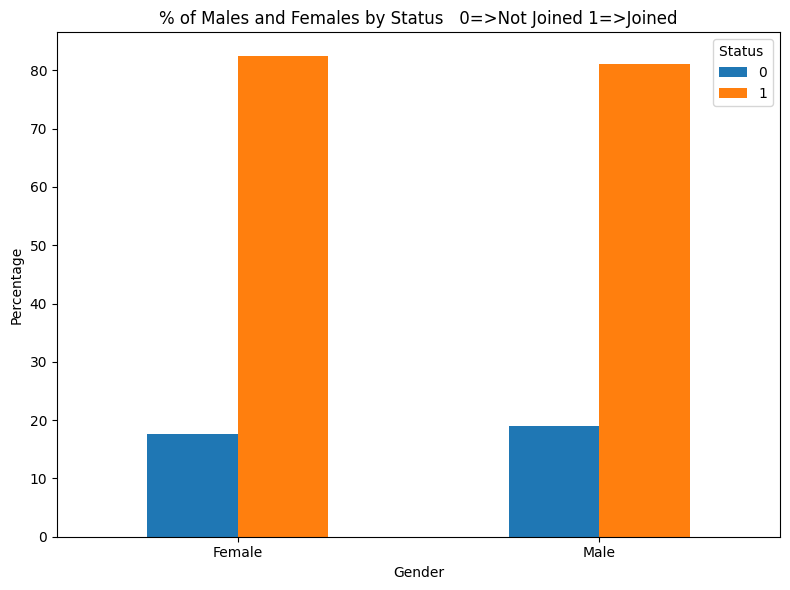

In [17]:
gender_split=round(pd.crosstab(df['Gender'],df['Status'],normalize='index')*100,2)
print(gender_split)
gender_split.plot(kind='bar', figsize=(8, 6))
plt.title('% of Males and Females by Status   0=>Not Joined 1=>Joined')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Status ')
plt.tight_layout()
plt.show()

Renege rate is same among males and females with approximately 17% to 18% renge on average

**Analysing renege by whether or not DOJ was extended**

Status                0          1
DOJ.Extended                      
No            18.922306  81.077694
Yes           18.445448  81.554552


Text(0.5, 1.0, '% of Employees by DOJ Extended     0=>Not Joined 1=>Joined')

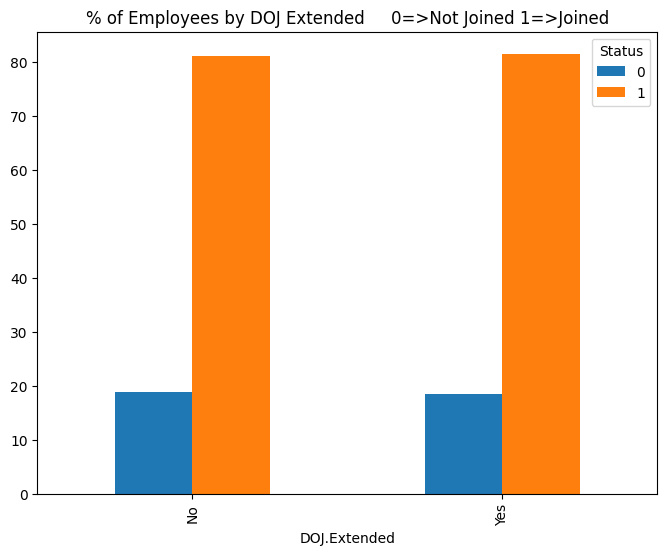

In [18]:
DOJ_Extend_Split=pd.crosstab(df['DOJ.Extended'],df['Status'],normalize='index')*100
print(DOJ_Extend_Split)
DOJ_Extend_Split.plot(kind='bar',figsize=(8,6))
plt.title('% of Employees by DOJ Extended     0=>Not Joined 1=>Joined')

Extension of DOJ is not a factor that has any bearing on renege with renege rate remaining at 20% in both classes

**Analysing If Duration To Accept Offer Is A Driver Of Renegation**

/tmp/ipython-input-19-1895834278.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Duration.to.accept.offer', data=df, palette=['red', 'green'])


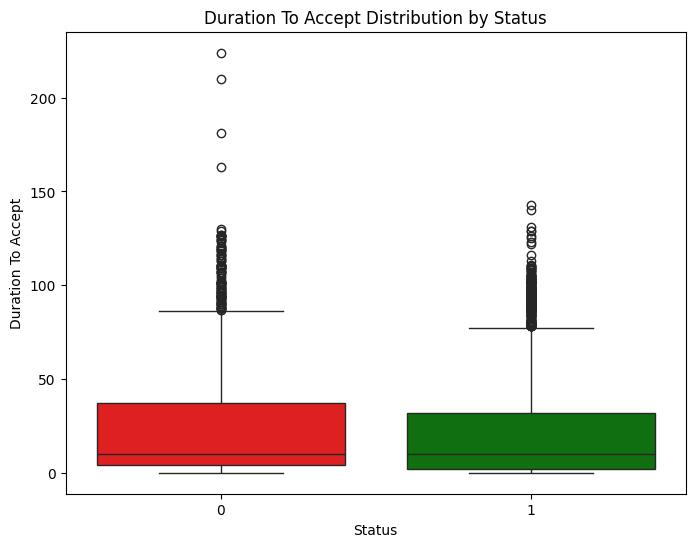

Status
0    24.956599
1    20.624368
Name: Duration.to.accept.offer, dtype: float64


In [19]:
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Duration.to.accept.offer', data=df, palette=['red', 'green'])


means = df.groupby('Status')['Duration.to.accept.offer'].mean()


plt.title('Duration To Accept Distribution by Status')
plt.xlabel('Status')
plt.ylabel('Duration To Accept')
plt.show()
print(means)

Candidates who didn't join took slightly on average longer to accept the offer at 25 days compared to 20 days for those who joined with candidates taking more time to accpet the offer

**Determining if notice period has any effect on candidates rejecting offer**

/tmp/ipython-input-20-4207551799.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Notice.period', data=df, palette=['red', 'green'])


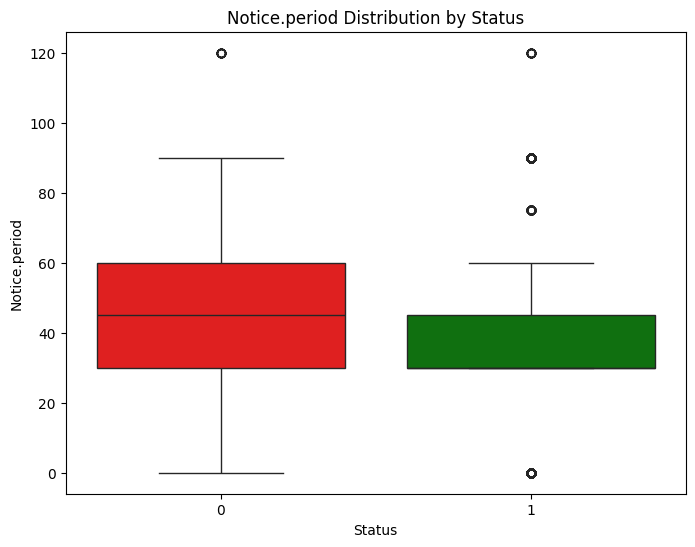

Status
0    48.192628
1    37.244633
Name: Notice.period, dtype: float64


In [20]:
# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Notice.period', data=df, palette=['red', 'green'])


means = df.groupby('Status')['Notice.period'].mean()


plt.title('Notice.period Distribution by Status')
plt.xlabel('Status')
plt.ylabel('Notice.period')
plt.show()
print(means)

Candidates who rejected the offer later haver a higher notice period at around 48 days on average comapred to 37  days for candidates who joined

Status            0      1
Offered.band              
E0            23.70  76.30
E1            18.70  81.30
E2            19.03  80.97
E3            14.85  85.15


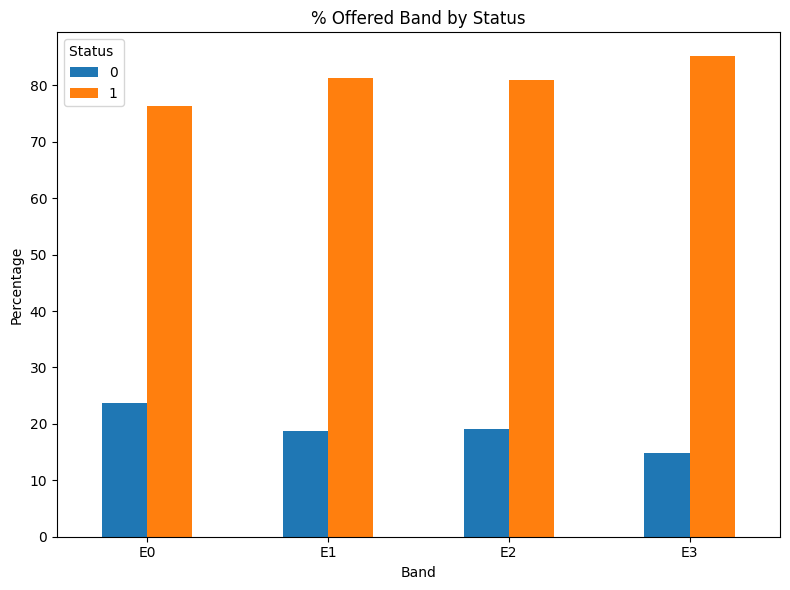

In [21]:
gender_split=round(pd.crosstab(df['Offered.band'],df['Status'],normalize='index')*100,2)
print(gender_split)
gender_split.plot(kind='bar', figsize=(8, 6))
plt.title('% Offered Band by Status')
plt.ylabel('Percentage')
plt.xlabel('Band')
plt.xticks(rotation=0)
plt.legend(title='Status ')
plt.tight_layout()
plt.show()

Offer rejection rate by candidates go down as bands progress from E0 to E3

In [24]:
df['Hike_Diff']=df['Percent.hike.offered.in.CTC']-df['Pecent.hike.expected.in.CTC']

In [26]:
df.describe()

,SLNO,Candidate.Ref,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age,Status,Hike_Diff
count,8995.000000,8.995000e+03,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,5970.984325,2.843647e+06,21.434464,39.291829,43.864804,40.657356,-1.573802,4.239022,29.913174,0.813007,-3.207447
std,3373.963454,4.863448e+05,25.811616,22.220239,29.788975,36.064060,19.610729,2.547571,4.097912,0.389927,27.412448
min,1.000000,2.109586e+06,0.000000,0.000000,-68.830000,-60.530000,-67.270000,0.000000,20.000000,0.000000,-200.000000
25%,3207.500000,2.386476e+06,3.000000,30.000000,27.270000,22.090000,-8.330000,3.000000,27.000000,1.000000,-12.755000
50%,5976.000000,2.807482e+06,10.000000,30.000000,40.000000,36.000000,0.000000,4.000000,29.000000,1.000000,0.000000
75%,8739.000000,3.300060e+06,33.000000,60.000000,53.850000,50.000000,0.000000,6.000000,34.000000,1.000000,0.000000
max,12333.000000,3.836076e+06,224.000000,120.000000,359.770000,471.430000,300.000000,24.000000,60.000000,1.000000,385.720000


In [25]:
#Define bins and labels
bins = [-np.inf, -12, 0, 100, 300, np.inf]
labels = ['<< Expected', 'Slightly < Expected', 'Near Expected', 'Slightly > Expected', '>> Expected']

# Step 3: Apply bucketing
df['Hike_Diff_Bucket'] = pd.cut(df['Hike_Diff'], bins=bins, labels=labels)

# (Optional) View distribution
print(df['Hike_Diff_Bucket'].value_counts().sort_index())

Hike_Diff_Bucket
<< Expected            2392
Slightly < Expected    5049
Near Expected          1462
Slightly > Expected      88
>> Expected               4
Name: count, dtype: int64


Status                   0       1
Hike_Diff_Bucket                  
<< Expected          22.58   77.42
Slightly < Expected  17.29   82.71
Near Expected        17.31   82.69
Slightly > Expected  18.18   81.82
>> Expected           0.00  100.00


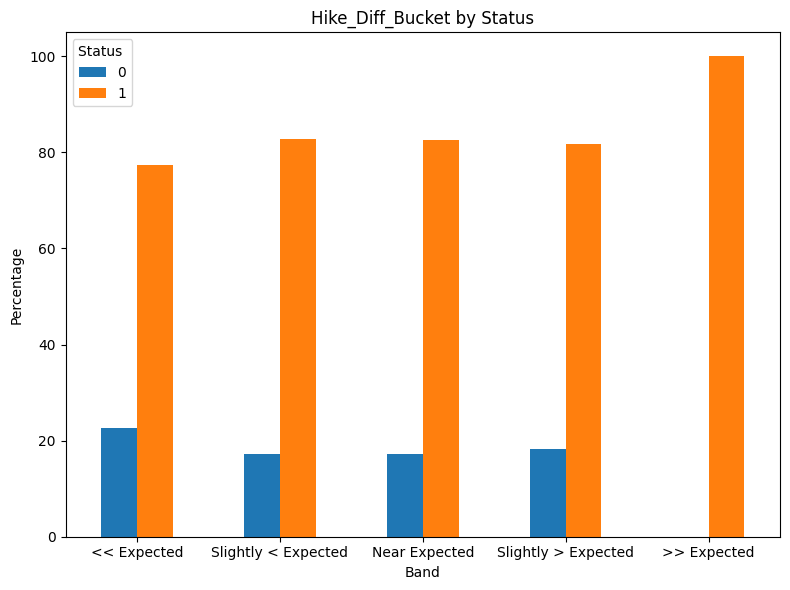

In [27]:
gender_split=round(pd.crosstab(df['Hike_Diff_Bucket'],df['Status'],normalize='index')*100,2)
print(gender_split)
gender_split.plot(kind='bar', figsize=(8, 6))
plt.title('Hike_Diff_Bucket by Status')
plt.ylabel('Percentage')
plt.xlabel('Band')
plt.xticks(rotation=0)
plt.legend(title='Status ')
plt.tight_layout()
plt.show()

Rejection after acceptoing offer was the highest among much less than hike expected which then decreased till much higher hike received

Status             0      1
Joining.Bonus              
No             18.66  81.34
Yes            19.42  80.58


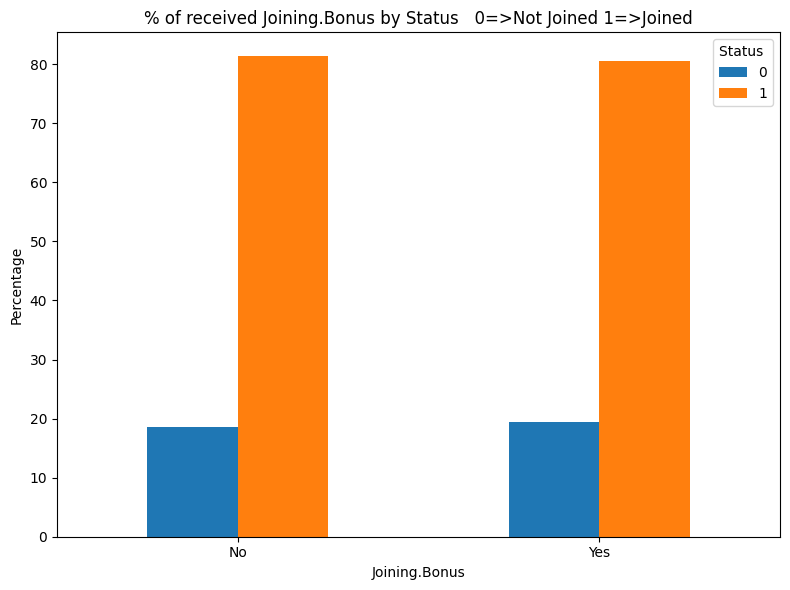

In [28]:
gender_split=round(pd.crosstab(df['Joining.Bonus'],df['Status'],normalize='index')*100,2)
print(gender_split)
gender_split.plot(kind='bar', figsize=(8, 6))
plt.title('% of received Joining.Bonus by Status   0=>Not Joined 1=>Joined')
plt.ylabel('Percentage')
plt.xlabel('Joining.Bonus')
plt.xticks(rotation=0)
plt.legend(title='Status ')
plt.tight_layout()
plt.show()

In [29]:
#Define bins and labels
bins = [20,30,40,50,60]
labels = ['20-30', '30-40', '40-50', '50-60']

# Step 3: Apply bucketing
df['Age_Bucket'] = pd.cut(df['Hike_Diff'], bins=bins, labels=labels)

# (Optional) View distribution
print(df['Hike_Diff_Bucket'].value_counts().sort_index())

Hike_Diff_Bucket
<< Expected            2392
Slightly < Expected    5049
Near Expected          1462
Slightly > Expected      88
>> Expected               4
Name: count, dtype: int64


Status          0      1
Age_Bucket              
20-30       13.50  86.50
30-40       16.00  84.00
40-50       15.48  84.52
50-60       10.42  89.58


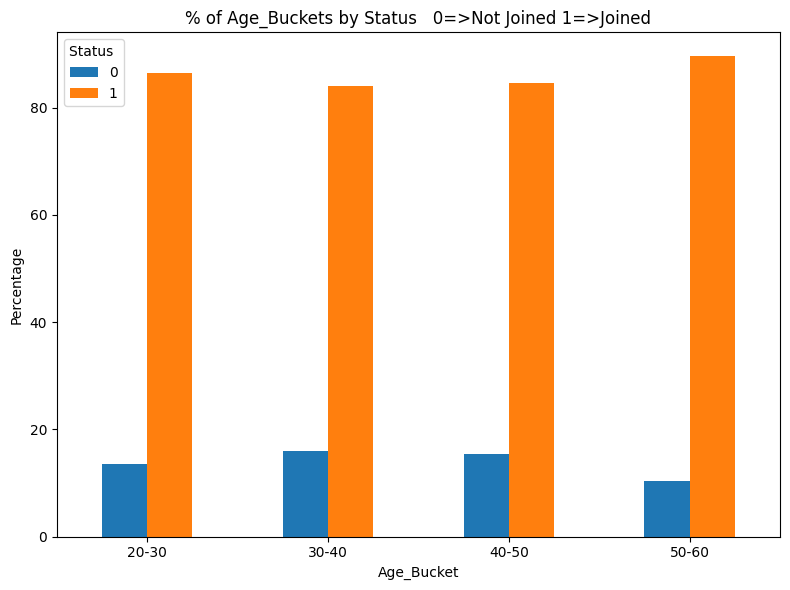

In [30]:
gender_split=round(pd.crosstab(df['Age_Bucket'],df['Status'],normalize='index')*100,2)
print(gender_split)
gender_split.plot(kind='bar', figsize=(8, 6))
plt.title('% of Age_Buckets by Status   0=>Not Joined 1=>Joined')
plt.ylabel('Percentage')
plt.xlabel('Age_Bucket')
plt.xticks(rotation=0)
plt.legend(title='Status ')
plt.tight_layout()
plt.show()

In [31]:
df_encoded.head()

,SLNO,Candidate.Ref,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age,Status,...,Location_Bangalore,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune
0,1,2110407,14,30,-20,13,42,7,34,1,...,0,0,0,0,0,0,0,1,0,0
1,2,2112635,18,30,50,320,180,8,34,1,...,0,1,0,0,0,0,0,0,0,0
2,3,2112838,3,45,42,42,0,4,27,1,...,0,0,0,0,0,0,0,1,0,0
3,4,2115021,26,30,42,42,0,4,34,1,...,0,0,0,0,0,0,0,1,0,0
4,5,2115125,1,120,42,42,0,6,34,1,...,0,0,0,0,0,0,0,1,0,0


In [32]:
drop_cols=['Candidate.Ref','SLNO',]
df_encoded.drop(drop_cols,axis=1,inplace=True)

In [33]:
# Compute correlation matrix
corr_matrix = df_encoded.corr(numeric_only=True)

corr_target = corr_matrix['Status'].sort_values(ascending=False)
print(corr_target)



Status                                1.000000
Candidate.relocate.actual_Yes         0.196234
LOB_INFRA                             0.113335
Location_Noida                        0.089906
Candidate.Source_Employee Referral    0.080253
Age                                   0.046270
Percent.difference.CTC                0.032593
Location_Mumbai                       0.030853
Percent.hike.offered.in.CTC           0.027654
Offered.band_E3                       0.024068
LOB_MMS                               0.019601
Candidate.Source_Direct               0.019291
Location_Others                       0.018245
LOB_ETS                               0.013075
DOJ.Extended_Yes                      0.006102
Location_Cochin                       0.004744
LOB_Healthcare                        0.002903
LOB_CSMP                              0.001474
Offered.band_E1                       0.000103
Pecent.hike.expected.in.CTC          -0.000183
Location_Gurgaon                     -0.001577
Location_Pune

In [34]:
cols_mod=df_encoded.columns
cols_mod

Index(['Duration.to.accept.offer', 'Notice.period',
       'Pecent.hike.expected.in.CTC', 'Percent.hike.offered.in.CTC',
       'Percent.difference.CTC', 'Rex.in.Yrs', 'Age', 'Status',
       'DOJ.Extended_Yes', 'Offered.band_E1', 'Offered.band_E2',
       'Offered.band_E3', 'Joining.Bonus_Yes', 'Candidate.relocate.actual_Yes',
       'Gender_Male', 'Candidate.Source_Direct',
       'Candidate.Source_Employee Referral', 'LOB_BFSI', 'LOB_CSMP', 'LOB_EAS',
       'LOB_ERS', 'LOB_ETS', 'LOB_Healthcare', 'LOB_INFRA', 'LOB_MMS',
       'Location_Bangalore', 'Location_Chennai', 'Location_Cochin',
       'Location_Gurgaon', 'Location_Hyderabad', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Noida', 'Location_Others',
       'Location_Pune'],
      dtype='object')

In [35]:
cols_keep=['Notice.period','Duration.to.accept.offer','LOB_BFSI','Candidate.relocate.actual_Yes','Location_Noida','LOB_INFRA','Candidate.Source_Employee Referral','Status']
X=df_encoded[cols_keep].drop('Status',axis=1)
y=df_encoded['Status']

In [36]:
X.head()

,Notice.period,Duration.to.accept.offer,LOB_BFSI,Candidate.relocate.actual_Yes,Location_Noida,LOB_INFRA,Candidate.Source_Employee Referral
0,30,14,0,0,1,0,0
1,30,18,0,0,0,1,1
2,45,3,0,0,1,1,0
3,30,26,0,0,1,1,1
4,120,1,0,1,1,1,1


In [37]:
y.head()

,Status
0,1
1,1
2,1
3,1
4,1


In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Confusion Matrix:
 [[  11  329]
 [  10 1449]]
Precision: 0.8149606299212598
Recall: 0.9931459904043866
F1 Score: 0.8952734012974977


In [39]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.03      0.06       340
           1       0.81      0.99      0.90      1459

    accuracy                           0.81      1799
   macro avg       0.67      0.51      0.48      1799
weighted avg       0.76      0.81      0.74      1799



## In this situation we need to minimise the false positives i.e candidates predicted as will join but later reject the offer. So precision is the most important metric here. Currently precision is at 81% which impies 19% of the candidates predicted as will join later leave. Although this is an improvement from the earlier 30%, we can check if we make the model more strict towards classifying it is a positve or ion other words we can intrese the threshold (right now it is 50%. Increasing thethreshold to 0.7 next model

Confusion Matrix:
 [[ 104  236]
 [ 167 1292]]
Precision: 0.8455497382198953
Recall: 0.8855380397532556
F1 Score: 0.8650820220957482


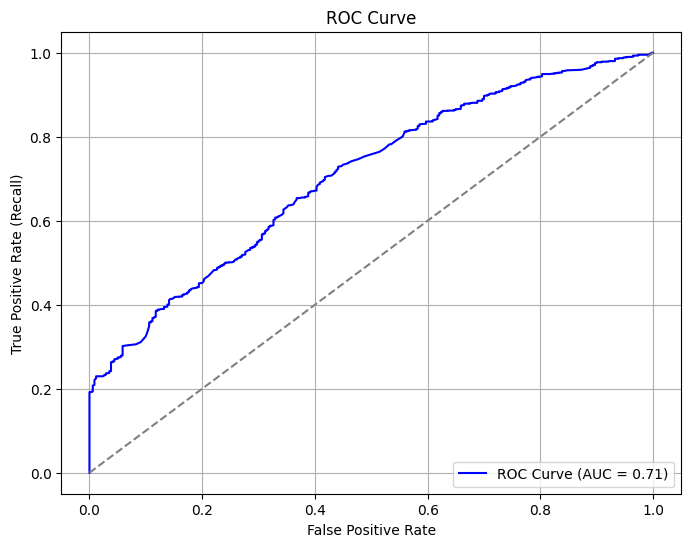

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# Step 1: Get predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Step 2: Set a new threshold
threshold = 0.7
y_pred_custom = (y_probs >= threshold).astype(int)

# Step 3: Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("Precision:", precision_score(y_test, y_pred_custom))
print("Recall:", recall_score(y_test, y_pred_custom))
print("F1 Score:", f1_score(y_test, y_pred_custom))

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Step 3: Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



# Precision improved to 85% meaning that only 15% of the candidates predicted as will join later reject the offer

# **Decision Tree Model With Hyperparamter Tuning**

Decision Tree Confusion Matrix:
[[ 157  183]
 [ 273 1186]]
              precision    recall  f1-score   support

           0       0.37      0.46      0.41       340
           1       0.87      0.81      0.84      1459

    accuracy                           0.75      1799
   macro avg       0.62      0.64      0.62      1799
weighted avg       0.77      0.75      0.76      1799



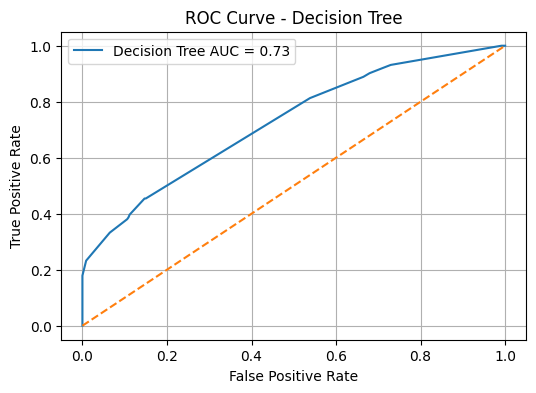

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define param grid
dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Grid search with class weighting
dt_grid = GridSearchCV(
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    param_grid=dt_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
dt_grid.fit(X_train, y_train)

# Best model
best_dt = dt_grid.best_estimator_
y_probs_dt = best_dt.predict_proba(X_test)[:, 1]
y_pred_dt = (y_probs_dt >= 0.5).astype(int)

# Evaluation
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# ROC curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
plt.figure(figsize=(6,4))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree AUC = {roc_auc_score(y_test, y_probs_dt):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve - Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


# Further improvement in offer retraction rate =(1-precision) to 13%

# **Random Forest Model**

Random Forest Confusion Matrix:
[[ 146  194]
 [ 328 1131]]
              precision    recall  f1-score   support

           0       0.31      0.43      0.36       340
           1       0.85      0.78      0.81      1459

    accuracy                           0.71      1799
   macro avg       0.58      0.60      0.59      1799
weighted avg       0.75      0.71      0.73      1799



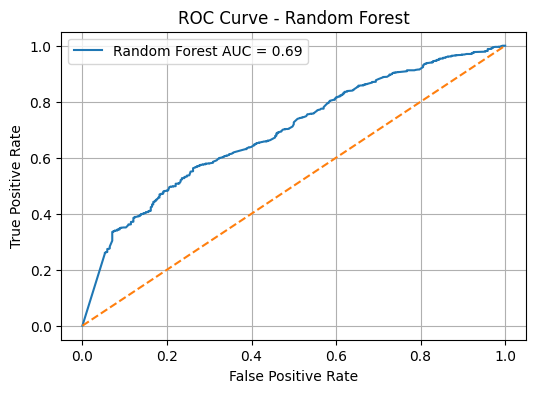

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Define param grid
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=rf_params,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)

# Best model
best_rf = rf_grid.best_estimator_
y_probs_rf = best_rf.predict_proba(X_test)[:, 1]
y_pred_rf = (y_probs_rf >= 0.5).astype(int)

# Evaluation
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest AUC = {roc_auc_score(y_test, y_probs_rf):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()
